In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.preprocessing import StandardScaler

## Datenvorverarbeitung

In [69]:
# load xlsx doc
df = pd.read_excel ('employment_08_09.xlsx')
# number of missing values in each column
df.isnull().sum()

age               0
race              0
earnwke         639
employed          0
unemployed        0
married           0
union             0
ne_states         0
so_states         0
ce_states         0
we_states         0
government        0
private           0
self              0
educ_lths         0
educ_hs           0
educ_somecol      0
educ_aa           0
educ_bac          0
educ_adv          0
female            0
dtype: int64

In [70]:
df.describe()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
count,5412.000000,5412.000000,4773.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,...,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000
mean,42.602365,1.227827,848.419432,0.875462,0.044161,0.650591,0.126940,0.210458,0.292129,0.249815,...,0.176275,0.705654,0.118071,0.067997,0.275868,0.196970,0.109756,0.220806,0.128603,0.488359
std,11.563492,0.564798,586.292696,0.330225,0.205472,0.476827,0.332937,0.407672,0.454783,0.432946,...,0.381089,0.455790,0.322722,0.251764,0.446992,0.397746,0.312614,0.414828,0.334791,0.499911
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,440.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,700.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,1100.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,63.000000,3.000000,2884.610000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# 1.Datenvorverarbeitung: employed != umemployed
nn = np.array(df.index)
nm = np.array(df.employed == df.unemployed)
o = nn * nm
equal_index = np.nonzero(o)
for x in equal_index:
    df = df.drop(x)
df

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,...,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,41,1,500.00,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,1,520.00,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,29,3,615.00,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,24,1,300.00,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5408,50,2,562.50,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5409,44,1,1038.46,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
5410,49,2,640.00,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [72]:
# 2.Datenvorverarbeitung: beeinhalten nur ein column employed or unemployed and liegt es vorner
df = df.drop('employed', axis = 1)
first_column = df.pop('unemployed')
df.insert(0, 'unemployed', first_column)
df

,unemployed,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,39,1,NaN,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,0,41,1,500.00,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,27,1,520.00,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,0,29,3,615.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,0,24,1,300.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
5408,0,50,2,562.50,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
5409,0,44,1,1038.46,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5410,0,49,2,640.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [83]:
# 3.Datenvorverarbeitung: deal with missing value(NaN)
df.earnwke = df.earnwke.fillna(df.earnwke.median())
df

,unemployed,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,0,53,1,720.00,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,39,1,720.00,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,0,41,1,500.00,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,27,1,520.00,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,0,29,3,615.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,0,24,1,300.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
5408,0,50,2,562.50,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
5409,0,44,1,1038.46,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5410,0,49,2,640.00,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


# a)

mögliche Methode um arbeislos 2009 vorherzusagen.(überwachtes Lernen)
SVM and decision tree

#### SVM

StandardScaler

In [7]:
%matplotlib inline

In [8]:
x = df.iloc[:, 1:len(df.columns)]
y = df.unemployed
y

0       0
1       0
2       0
3       0
4       0
       ..
5407    0
5408    0
5409    0
5410    0
5411    0
Name: unemployed, Length: 4977, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [10]:
model = SVC(kernel = 'linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [11]:
y_test.tail(20)

77      0
2396    0
189     0
4246    0
2562    0
3299    0
1007    0
3469    0
295     0
5371    0
5174    0
3566    0
4189    0
3807    0
3881    0
4853    0
2347    0
1916    0
4951    0
314     0
Name: unemployed, dtype: int64

In [12]:
pre_y = model.predict(x_test)
pre_y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [13]:
model.score(x_train, y_train)

0.8922381311228335

In [14]:
model.score(x_test, y_test)

0.8945783132530121

In [15]:
x_test

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
1815,41,1,332.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5057,49,1,720.00,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
237,40,1,720.00,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4168,23,1,518.40,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3963,57,2,800.00,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,22,1,400.00,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2347,51,1,424.00,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1916,54,2,434.00,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4951,37,1,615.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


In [16]:
pre_table = x_test.assign(predict_SVM = pre_y)
pre_table

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,predict_SVM
1815,41,1,332.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5057,49,1,720.00,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
237,40,1,720.00,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1
4168,23,1,518.40,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3963,57,2,800.00,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,22,1,400.00,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2347,51,1,424.00,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1916,54,2,434.00,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4951,37,1,615.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [17]:
unemploy_SVM = pre_table.loc[pre_table['predict_SVM'] == 1]

In [27]:
unemploy_SVM.describe()

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,predict_SVM
count,63.000000,63.000000,63.0,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.0,63.0,63.0,63.000000,63.000000,63.000000,63.0,63.000000,63.0,63.000000,63.0
mean,47.015873,1.238095,720.0,0.793651,0.0,0.126984,0.269841,0.365079,0.238095,0.0,0.0,1.0,0.111111,0.507937,0.206349,0.0,0.174603,0.0,0.095238,1.0
std,10.066700,0.640420,0.0,0.407935,0.0,0.335630,0.447443,0.485320,0.429339,0.0,0.0,0.0,0.316794,0.503953,0.407935,0.0,0.382677,0.0,0.295901,0.0
min,23.000000,1.000000,720.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
25%,39.000000,1.000000,720.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
50%,49.000000,1.000000,720.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
75%,55.000000,1.000000,720.0,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
max,63.000000,3.000000,720.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.0


age = 49, race =1, earnwke = NaN, married = 1, self = 1, edu = 1

In [18]:
statistics.mode(unemploy_SVM.age)

54

In [19]:
x_test

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
1815,41,1,332.00,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5057,49,1,720.00,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
237,40,1,720.00,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4168,23,1,518.40,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
3963,57,2,800.00,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,22,1,400.00,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
2347,51,1,424.00,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1916,54,2,434.00,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4951,37,1,615.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


#### decision tree

In [20]:
# create a decision tree function
dt_model = DecisionTreeClassifier(random_state = 5, max_depth = 5)
dt_model.fit(x_train, y_train)
dt_model.score(x_test, y_test)

0.9427710843373494

In [21]:
dt_model.score(x_train, y_train)

0.9542828435066566

In [22]:
y_dt_pre = dt_model.predict(x_test)
y_dt_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
pre_table = x_test.assign(unemployed = y_test)
pre_table = pre_table.assign(predict_DT = y_dt_pre)
pre_table

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,...,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,unemployed,predict_DT
1815,41,1,332.00,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5057,49,1,720.00,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
237,40,1,720.00,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4168,23,1,518.40,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3963,57,2,800.00,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,22,1,400.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2347,51,1,424.00,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1916,54,2,434.00,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4951,37,1,615.38,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [25]:
unemployed_predic = pre_table[pre_table['predict_DT'] == 1]
unemployed_predic

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,...,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,unemployed,predict_DT
5354,51,3,445.60,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
766,51,3,720.00,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
765,56,3,720.00,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
508,30,1,2440.00,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4399,38,1,1300.00,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3354,53,3,600.00,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2657,57,3,1134.61,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5072,19,1,999.75,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
5196,54,3,720.00,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
4393,18,1,40.00,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1


In [28]:
unemployed_predic.describe()

,age,race,earnwke,married,union,ne_states,so_states,ce_states,we_states,government,...,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,unemployed,predict_DT
count,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.0,11.000000,11.0,11.0
mean,42.454545,2.090909,1010.905455,0.545455,0.0,0.181818,0.181818,0.181818,0.454545,0.363636,...,0.272727,0.363636,0.545455,0.090909,0.0,0.0,0.0,0.363636,0.0,1.0
std,14.542102,1.044466,693.150132,0.522233,0.0,0.404520,0.404520,0.404520,0.522233,0.504525,...,0.467099,0.504525,0.522233,0.301511,0.0,0.0,0.0,0.504525,0.0,0.0
min,18.000000,1.000000,40.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0
25%,34.000000,1.000000,660.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0
50%,51.000000,3.000000,720.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0
75%,53.500000,3.000000,1217.305000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.500000,1.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,1.0
max,57.000000,3.000000,2440.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.0


In [26]:
statistics.mode(unemployed_predic.age)

51

age = 51, race = 3, earnwke = NaN, married edu_hs = 1

Zusammenfassung: gemäß decision tree Mothede finde ich, dass die Menschen, die age ungefähr 43 , race white, earnwke NaN oder earnwke ungefähr 600 Euro, größere Chance arbeitlos im Jahr 2009 als andere Leute. 

es gibt keine deutlich Erscheinung, dass ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während Finanzkrise 2008-2009.
Aber der Meschen, wer ungefähr 41 Jahre alt sind, ein höheres Risiko für Arbeitslosigkeit während Finanzkrise 2008-2009 hat. 

# b)

Growth contains data on average growth rates over 1960-1995 for 65 countries, along with
variables that are potentially related to growth. These data were provided by Professor Ross
Levine of Brown University and were used in his paper with, Thorsten Beck and Norman Loayza
“Finance and the Sources of Growth” Journal of Financial Economics, 2000, Vol. 58, pp. 261-
300.

In [37]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_excel('Growth.xlsx')
# all oil is equal 0 in this xlsx. so it can be delete.
df.drop('oil', inplace = True, axis = 1)
df.describe()

,growth,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,1.942715,3103.784649,0.564703,3.985077,0.167450,0.277564
std,1.897120,2512.656846,0.289270,2.542000,0.224680,0.491528
min,-2.811944,366.999939,0.140502,0.200000,0.000000,0.000000
25%,0.838156,1147.999756,0.393251,1.940000,0.000000,0.000000
50%,1.975147,2019.000244,0.543337,3.650000,0.066667,0.100000
75%,2.880327,5143.000977,0.681555,5.560000,0.266667,0.233333
max,7.156855,9895.003906,1.992616,10.070000,0.970370,2.466667


In [39]:
df.dtypes

country_name      object
growth           float64
rgdp60           float64
tradeshare       float64
yearsschool      float64
rev_coups        float64
assasinations    float64
dtype: object

In [40]:
df.columns

Index(['country_name', 'growth', 'rgdp60', 'tradeshare', 'yearsschool',
       'rev_coups', 'assasinations'],
      dtype='object')

In [41]:
y = df.iloc[:,0:2]
x = df.iloc[:,2:]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2) 

In [43]:
y_train

,country_name,growth
28,Guatemala,0.929231
54,Panama,2.027189
4,United States,1.712265
10,Australia,1.975147
35,Trinidad and Tobago,1.120786
52,Sri Lanka,2.704598
46,Israel,2.810969
30,El Salvador,-0.607556
7,Colombia,2.227014
14,Zaire,-2.811944


In [44]:
train_y = y_train.iloc[:,1]
test_y = y_test.iloc[:,1]

In [45]:
train_y = train_y.values.reshape(-1,1)

In [48]:
regressor_b = LinearRegression()

In [49]:
regressor_b.fit(x_train, train_y)

LinearRegression()

In [50]:
predic = regressor_b.predict(x_test)
predic

array([[ 2.41147464],
       [ 1.24239158],
       [ 1.20145613],
       [ 4.03200661],
       [ 1.75033149],
       [ 2.17968395],
       [ 2.65362675],
       [ 1.48390993],
       [-0.85971772],
       [ 2.38281288],
       [ 1.92961423],
       [ 3.25852556],
       [ 1.76620637]])

In [51]:
y_test.iloc[:,1]

45    3.012389
29    0.597785
43    3.647310
62    2.651335
34   -0.437824
33    1.888134
31    1.446995
40    0.838156
26   -0.883551
63    3.024178
22    1.962219
2     4.304759
11    2.932981
Name: growth, dtype: float64

In [52]:
y_test.iloc[:,0]

45           Iceland
29          Honduras
43          Portugal
62           Belgium
34           Senegal
33            Sweden
31             Chile
40          Zimbabwe
26         Venezuela
63         Mauritius
22    United Kingdom
2              Japan
11             Italy
Name: country_name, dtype: object

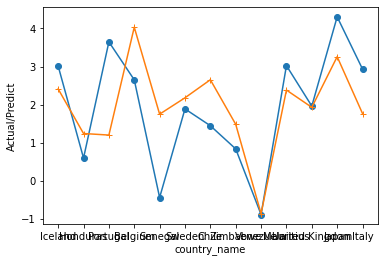

In [53]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(y_test.iloc[:,0], y_test.iloc[:,1], marker="o")
ax.set_xlabel("country_name")
ax.set_ylabel("Actual/Predict")
ax.plot(y_test.iloc[:,0], predic, marker="+")
plt.show()

# C)

In [330]:
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.api as sm

In [331]:
df_c = pd.read_fwf('crabs.txt', names=['Id', 'Color', 'Spine', 'Width', 'Weight', 'Sallite'],index_col=[0])
df_c

,Color,Spine,Width,Weight,Sallite
Id,,,,,
1,2,3,28.3,3.05,8
2,3,3,26.0,2.60,4
3,3,3,25.6,2.15,0
4,4,2,21.0,1.85,0
5,2,3,29.0,3.00,1
...,...,...,...,...,...
169,2,3,28.3,3.20,0
170,2,3,26.5,2.35,4
171,2,3,26.5,2.75,7


Charakteristika sind wie color, spine, width, weight,

In [332]:
from sklearn.model_selection import train_test_split
c_train, c_test  = train_test_split(df_c, test_size=0.2) 

In [333]:
c_train

,Color,Spine,Width,Weight,Sallite
Id,,,,,
124,2,3,29.5,3.02,4
68,3,3,23.1,1.55,0
13,2,1,30.3,3.60,3
17,2,3,30.0,3.05,8
34,4,3,25.8,2.25,10
...,...,...,...,...,...
77,1,2,24.5,1.95,6
26,2,3,24.5,1.60,1
139,2,3,26.8,2.65,0


In [334]:
c_train = c_train.iloc[:,0:5]

In [335]:
c_train

,Color,Spine,Width,Weight,Sallite
Id,,,,,
124,2,3,29.5,3.02,4
68,3,3,23.1,1.55,0
13,2,1,30.3,3.60,3
17,2,3,30.0,3.05,8
34,4,3,25.8,2.25,10
...,...,...,...,...,...
77,1,2,24.5,1.95,6
26,2,3,24.5,1.60,1
139,2,3,26.8,2.65,0


In [336]:
c_test = c_test.iloc[:,0:5]

In [337]:
c_test

,Color,Spine,Width,Weight,Sallite
Id,,,,,
114,2,3,29.0,3.10,1
11,1,1,26.1,2.80,5
172,3,3,26.1,2.75,3
24,2,1,28.7,3.20,0
110,2,1,26.8,2.55,0
54,4,3,23.4,1.90,0
33,2,1,24.9,2.30,6
152,4,3,23.5,1.90,0
151,2,3,25.8,2.30,0


In [338]:
expr = """Sallite ~ Color + Spine + Width + Weight"""
y_c_train, x_c_train = dmatrices(expr, c_train, return_type='dataframe')
y_c_test, x_c_test = dmatrices(expr, c_test, return_type='dataframe')
x_c_test

,Intercept,Color,Spine,Width,Weight
Id,,,,,
114,1.0,2.0,3.0,29.0,3.10
11,1.0,1.0,1.0,26.1,2.80
172,1.0,3.0,3.0,26.1,2.75
24,1.0,2.0,1.0,28.7,3.20
110,1.0,2.0,1.0,26.8,2.55
54,1.0,4.0,3.0,23.4,1.90
33,1.0,2.0,1.0,24.9,2.30
152,1.0,4.0,3.0,23.5,1.90
151,1.0,2.0,3.0,25.8,2.30


In [339]:
poisson_training_results = sm.GLM(y_c_train, x_c_train, family = sm.families.Poisson()).fit()

In [340]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Sallite   No. Observations:                  138
Model:                            GLM   Df Residuals:                      133
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -365.41
Date:                Mon, 10 May 2021   Deviance:                       435.89
Time:                        20:03:28   Pearson chi2:                     443.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4975      1.040     -0.478      0.632      -2.536       1.541
Color         -0.1882      0.071     -2.643      0.008      -0.328      -0.049
Spine          0.0556      0.062      0.903      0.366      -0.065       0.176
Width          0.0067      0.055      0.122      0.903      -0.101       0.114
Weight         0.6909      0.213      3.250      0.001       0.274       1.108
==============================================================================
"""

In [341]:
p = poisson_training_results.predict(x_c_test)

In [342]:
p

Id
114     5.094823
11      4.386604
172     3.250524
24      4.874499
110     3.071753
54      1.470029
33      2.551922
152     1.471010
151     2.869529
79      2.608088
145     2.849952
148     1.651640
104     3.083014
82      4.246767
134     2.323026
165    20.042749
103     2.590482
57      1.702565
147     1.292527
58      2.085288
66      4.905437
43      4.779540
10      5.221406
95      4.261705
111     3.704880
168     2.049440
131     2.056589
118     1.811907
105     1.489039
112     3.925731
99      2.485885
119     1.085656
158     2.068971
154     2.291841
41      2.833927
dtype: float64

In [347]:
poisson_predictions = poisson_training_results.get_prediction(x_c_test)
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
Id,,,,
114,5.094823,0.402796,4.363483,5.948739
11,4.386604,0.609364,3.341057,5.759342
172,3.250524,0.330063,2.663920,3.966301
24,4.874499,0.490282,4.002351,5.936696
110,3.071753,0.303508,2.530942,3.728124
54,1.470029,0.204399,1.119364,1.930548
33,2.551922,0.294428,2.035449,3.199445
152,1.471010,0.201984,1.123926,1.925279
151,2.869529,0.212344,2.482116,3.317411


In [344]:
poisson_predictions

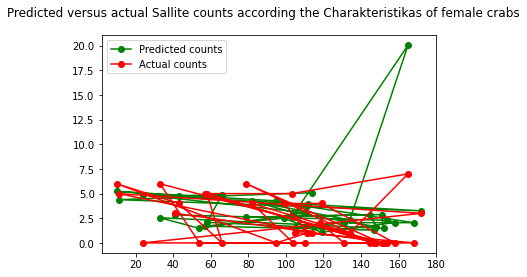

In [345]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_c_test['Sallite']

fig = plt.figure()
fig.suptitle('Predicted versus actual Sallite counts according the Charakteristikas of female crabs')

predicted, = plt.plot(x_c_test.index, predicted_counts, 'go-', label ='Predicted counts')
actual, = plt.plot(x_c_test.index, actual_counts, 'ro-', label = 'Actual counts')

plt.legend(handles = [predicted, actual])
plt.show()

# d)

In [56]:
#Load the Dataset from CSV files
df_d = pd.read_csv("gasoline.csv")
df_d

,yield,gravity,pressure,temp10,temp,batch
0,0.122,50.8,8.6,190,205,1
1,0.223,50.8,8.6,190,275,1
2,0.347,50.8,8.6,190,345,1
3,0.457,50.8,8.6,190,407,1
4,0.080,40.8,3.5,210,218,2
5,0.131,40.8,3.5,210,273,2
6,0.266,40.8,3.5,210,347,2
7,0.074,40.0,6.1,217,212,3
8,0.182,40.0,6.1,217,272,3
9,0.304,40.0,6.1,217,340,3


In [57]:
X = df_d.iloc[:,1:6]
y = df_d.iloc[:,0]

In [54]:
from scipy.special import expit, logit

In [58]:
X.shape

(32, 5)

In [59]:
y

0     0.122
1     0.223
2     0.347
3     0.457
4     0.080
5     0.131
6     0.266
7     0.074
8     0.182
9     0.304
10    0.069
11    0.152
12    0.260
13    0.336
14    0.144
15    0.268
16    0.349
17    0.100
18    0.248
19    0.317
20    0.028
21    0.064
22    0.161
23    0.278
24    0.050
25    0.176
26    0.321
27    0.140
28    0.232
29    0.085
30    0.147
31    0.180
Name: yield, dtype: float64

In [60]:
from scipy.special import loggamma
from scipy.special import expit, logit

def logLikelihood(params, y, X):
    b = np.array(params[0:-1])
    phi = params[-1]
    mu = expit(np.dot(X,b))
    
    eps = 1e-6
    res = -np.sum(loggamma(phi+eps)
                 - loggamma(mu * phi+ eps)
                 + (mu*phi-1)*np.log(y+eps)
                 +((1-mu)* phi -1)*np.log(1-y+eps))
    return res

In [69]:
from scipy.optimize import minimize

phi = 1
b0 = 1
x0 = np.array([b0, b0, b0, b0, b0, phi])
res = minimize(logLikelihood, x0=x0, args= (y, X), bounds=[(None,None)
                                                           ,(None,None)
                                                           ,(None,None)
                                                           ,(None,None)
                                                           ,(None,None)
                                                           ,(0,None)])

In [70]:
res

      fun: -65.09587902022267
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       57.79926653])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([1., 1., 1., 1., 1., 0.])

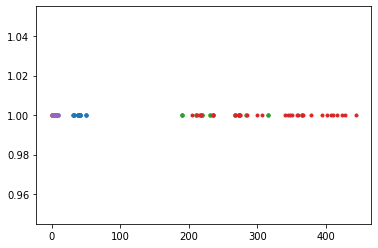

In [79]:
b = np.array(res.x[0:X.shape[1]])
y_ = expit(np.dot(X,b))
plt.plot(X, y_, '.')

In [72]:
y_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])